#### **PyTorch Computer Vision**
##### **0.Computer vision libraries in PyTorch**
- `torchvision` - base domain library for PyTorch computer vision.
- `torchvision.datasets` - get datasets and data loading functions for computer vision here.
- `torchvision.models` - get pretrained computer vision models that can leverage for our own problems.
- `torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model.
- `torch.utils.data.Dataset` - Base dataset class for PyTorch.
- `torch.utils.data.DataLoader` - Creates a Python interable over a dataset. 

**Explanation :**  
  
You need to import `torch` (the main toolbox) to use `nn` (a module inside it), as `nn` can't be accessed without the toolbox.

---
You can import `ToTensor` directly from `torchvision.transforms` without importing `transforms` separately, as `torchvision` is the main toolbox containing the `transforms` module with `ToTensor` inside.

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets # datasets and data loading functions
from torchvision import transforms # manipulating with vision data
from torchvision.transforms import ToTensor 

# Import matplotlib for visualization 
import matplotlib.pyplot as plt

# Check versions 
print(torch.__version__)
print(torchvision.__version__)


2.6.0+cpu
0.21.0+cpu


**`ToTensor` Explanation:**   
  
`ToTensor` from `torchvision.transforms` converts a PIL Image or NumPy array into a PyTorch tensor, reformatting it from HWC to CHW and scaling pixel values from [0, 255] to [0.0, 1.0] for PyTorch model compatibility.

##### **1. Getting a dataset:**


In [1]:
# Setup training data 
from torchvision import datasets 
from torchvision.transforms import ToTensor 

train_data = datasets.FashionMNIST(
    root = 'data', # where to download data?(directory)
    train = True, # do we want the training dataset?
    download = True, # do we want to download or not?
    transform = ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False, # we want the test dataset, train dataset should be False
    download = True,
    transform=ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:14<00:00, 1.83MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]
100%|██████████| 4.42M/4.42M [00:03<00:00, 1.36MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 5.13MB/s]


***Explanation:***  
  
**`ToTensor()`: Converts input images to PyTorch tensors.**

**`target_transform=None`: Leaves the labels unchanged; no processing is applied to them.**

In [2]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data.dim() # train_data is a object not a tensor
# this is why you are getting an error 

AttributeError: 'FashionMNIST' object has no attribute 'dim'

In [ ]:
# See the first training example
image, labels = train_data[0] # return the tensor of first image of train_data 
image, labels 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [3]:
class_names = train_data.classes 
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [12]:
type(class_names)

list

In [5]:
class_to_idx = train_data.class_to_idx 
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

##### **1.1 Check input & output shapes of data:**

In [11]:
print(f'Image shape: {image.shape} -> [color_channels, height, width]')
# [height, width, color_channels] to [color_channels, height, width]
print(f'Image label: {class_names[labels]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


##### **1.2 Visualizing our data:**

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

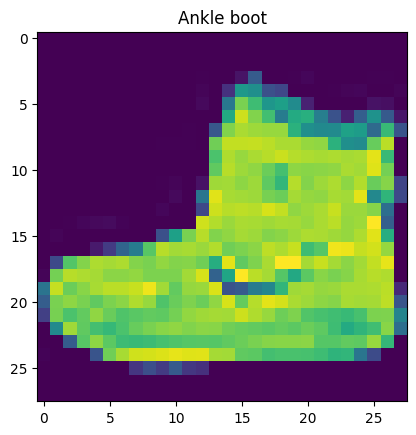

In [17]:
import matplotlib.pyplot as plt 
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze()) # imshow takes only 2D array 
# plt.axes('off')
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

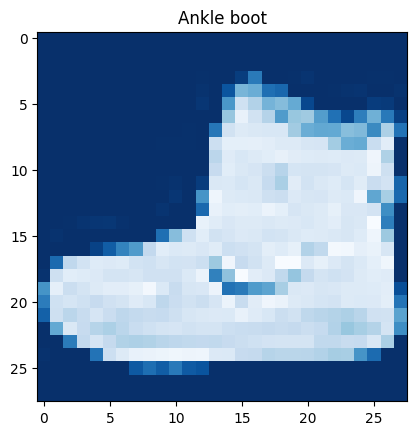

In [19]:
plt.imshow(image.squeeze(), cmap='Blues_r')
plt.title(class_names[label])